In [1]:
# useful imports
import pandas as pd
import numpy as np
import os
import re

from pyspark.sql import SparkSession
from pyspark.shell import spark
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

spark = (
    SparkSession.builder.appName("MAST30034 Project 2")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.0
      /_/

Using Python version 3.7.4 (default, Aug 13 2019 15:17:50)
Spark context Web UI available at http://10.13.147.111:4040
Spark context available as 'sc' (master = local[*], app id = local-1665807805326).
SparkSession available as 'spark'.


In [2]:
# read the curated data
merchant_df = pd.read_parquet('../data/curated/final_merchant_statistics')

In [494]:
merch_df1 = merchant_df.drop(['name','tags','tag','revenue_level'], axis=1)

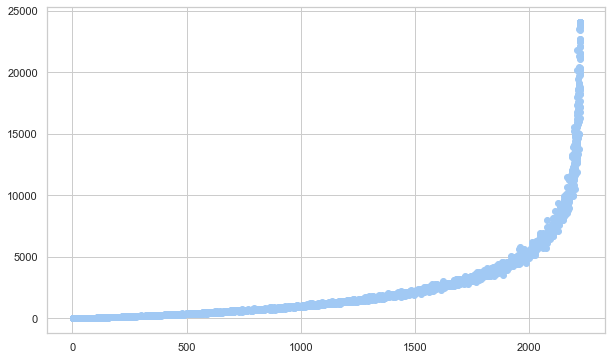

In [495]:
plt.scatter(merch_df1['sa2_region_count'],merch_df1['unique_customers'])

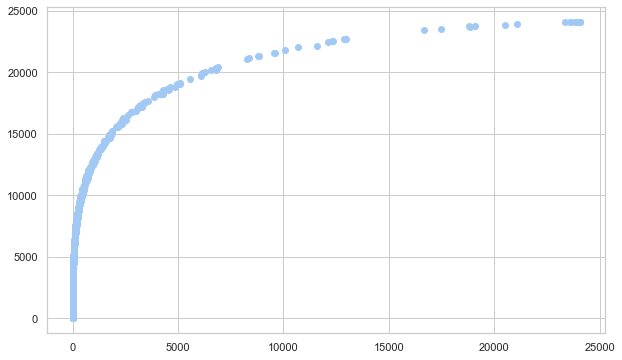

In [496]:
plt.scatter(x=merch_df1['returning_customers'],y=merch_df1['unique_customers'])

In [497]:
merchant_df

,merchant_abn,name,tags,tag,revenue_level,take_rate,sales_revenue,discounted_sales_revenue,num_orders,approximate_fraudulent_orders,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,7.032777e+05,6.554602e+05,3261,216.117177,...,1265.899881,1179.828379,0.066273,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10323485998,Nunc Inc.,"[(furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",a,6.61,1.326997e+06,1.239420e+06,10306,664.448991,...,87714.498178,81925.655360,0.064472,2150.0,815.744497,238.0,8388.0,158.201830,130.522996,398.0
2,10342410215,Facilisis Facilisis Corp.,"([computers, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.34,3.294596e+05,3.053016e+05,857,59.650593,...,20887.741786,19356.121304,0.069604,876.0,785.972844,0.0,850.0,387.599588,273.855501,38.0
3,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,6.775178e+03,6.166115e+03,6,0.492377,...,241.873872,220.130319,0.082063,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
4,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2.519346e+04,2.342538e+04,74,5.026389,...,1665.287911,1548.417412,0.067924,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,94380689142,Aliquet Ltd,"[(motor vehicle supplies and new parts), (b), ...",motor vehicle supplies and new parts,b,3.77,1.846750e+04,1.677845e+04,14,1.235399,...,696.224669,632.547682,0.088243,24.0,739.169791,0.0,14.0,1319.106990,452.409767,0.0
4022,95331380653,Auctor Odio Associates,"[[bicycle shops - sales and service], [a], [ta...",bicycle shops - sales and service,a,5.65,9.986527e+04,9.135626e+04,108,8.612226,...,5642.387734,5161.628966,0.079743,161.0,768.257708,0.0,108.0,924.678423,507.061325,4.0
4023,96794593428,Nunc Id Enim Inc.,"([cable, satellitE, and other pAy television a...","cable, satellite, and other pay television and...",a,5.75,4.042552e+04,3.784301e+04,674,42.463349,...,2324.467644,2175.973172,0.063002,755.0,788.973658,0.0,667.0,60.607982,50.651087,28.0
4024,98850646791,Sapien Industries,"[[hobby, toy and game shops], [b], [take rate:...","hobby, toy and game shops",b,3.66,5.965319e+03,5.428771e+03,4,0.355936,...,218.330680,198.693025,0.088984,5.0,855.125000,0.0,4.0,1491.329779,312.966965,0.0


In [39]:
merchant_df.sort_values('sa2_region_count')

,merchant_abn,name,tags,tag,revenue_level,take_rate,sales_revenue,discounted_sales_revenue,num_orders,approximate_fraudulent_orders,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
3255,34205660775,A Magna Associates,"[(antiQue shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",a,6.30,1282.631323,1175.775606,1,0.083310,...,80.805773,74.073863,0.083310,1.0,1280.0,0.0,1.0,1282.631323,NaN,0.0
2072,21350600012,Nullam Suscipit Est PC,"[[jewelry, watch, clock, and silverware shops]...","jewelry, watch, clock, and silverware shops",b,4.72,1476.217037,1340.616430,1,0.091857,...,69.677444,63.277096,0.091857,1.0,722.0,0.0,1.0,1476.217037,NaN,0.0
1627,68480514246,Vitae Mauris Foundation,"[(motor vehicle supplies and new Parts), (b), ...",motor vehicle supplies and new parts,b,5.05,1396.498180,1276.686501,1,0.085794,...,70.523158,64.472668,0.085794,1.0,744.0,0.0,1.0,1396.498180,NaN,0.0
2917,96190048310,Penatibus Et Inc.,"((equipment, tool, furniture, and appliance re...","equipment, tool, furniture, and appliance rent...",c,2.09,956.138894,880.562648,1,0.079043,...,19.983303,18.403759,0.079043,1.0,752.0,0.0,1.0,956.138894,NaN,0.0
3593,65415777658,Nulla Interdum Curabitur Institute,"[(art dealers and galleries), (c), (take rate:...",art dealers and galleries,c,1.72,696.777143,646.038456,1,0.072819,...,11.984567,11.111861,0.072819,1.0,806.0,0.0,1.0,696.777143,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3882,91880575299,At Foundation,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",b,3.40,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3902,93267734067,Curae Foundation,"((jeweLry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.57,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3911,93915598279,Molestie Pharetra Nibh LLP,"([antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,1.47,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3963,99801770627,Cras Convallis Ltd,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",b,4.97,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
region_order = merchant_df[['merchant_abn','sa2_region_count','num_orders']]

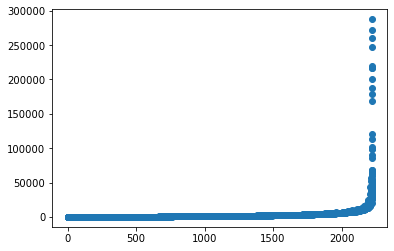

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x='sa2_region_count', y='num_orders', data=region_order)

In [65]:
income = merchant_df.sort_values('median_customer_income', ascending=True)[:3][['merchant_abn','median_customer_income','mean_spending']]

In [89]:
data = {'Merchant ABN':[53877856360,83199298021,97590358496,53877856360,83199298021,97590358496],
        'variables':['Customer Weekly Income','Customer Weekly Income','Customer Weekly Income', \
               'Average Customer Spending','Average Customer Spending','Average Customer Spending'],
        'Amount':[435.5,499.67,561,2045.32, 1971.66,1129.36]}
data = pd.DataFrame(data)

In [90]:
data

,Merchant ABN,variables,Amount
0,53877856360,Customer Weekly Income,435.50
1,83199298021,Customer Weekly Income,499.67
2,97590358496,Customer Weekly Income,561.00
3,53877856360,Average Customer Spending,2045.32
4,83199298021,Average Customer Spending,1971.66
5,97590358496,Average Customer Spending,1129.36


In [ ]:
#173038, #234a55, #a4c1c8, #66aac1, #988c55, #4c462a

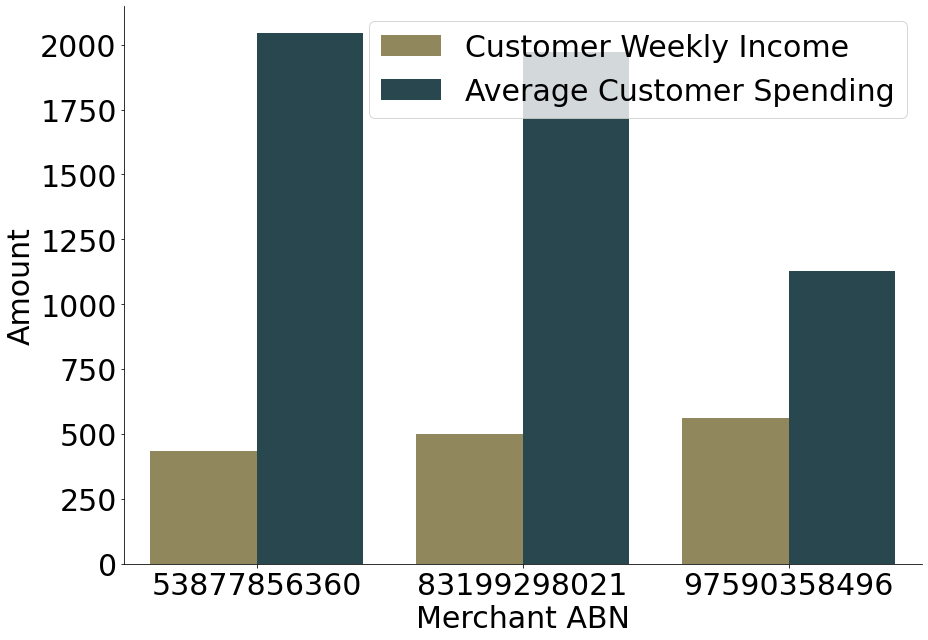

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
sns.barplot(x='Merchant ABN',y='Amount', hue='variables', data=data, palette={'#234a55','#988c55'})
# ax.legend(['Customer Median Income','Average Customer Spending'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:], fontsize=30)
# ax.text(fontproperties=font_prop)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_ylabel('Amount', fontsize=30)
ax.set_xlabel('Merchant ABN', fontsize=30)
fig.tight_layout()
fig.savefig('income_spending.png', transparent=True, dpi=300)

In [ ]:
pd.melt(income, id_vars="merchant_abn", var_name="sex", value_name="survival rate")

In [9]:
sns.catplot(x = 'merchant_abn', y='median_customer_income', 
            hue = '',data=income, 
            kind='bar')

NameError: name 'sns' is not defined

In [3]:
merchant_region = spark.read.parquet("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/curated/merchant_consumers")

In [4]:
merchant_region

merchant_abn,user_id,tot_dollar_value,num_order_id
94493496784,124,694.3735309241376,6
69108448846,183,381.93654315174035,1
37097551567,310,318.252429594987,1
69703285964,18882,60.12376338610934,1
26510188921,18891,156.12101900470114,1
99467302626,544,254.17174954843307,1
32946666313,578,899.0385727053385,2
54291122944,19157,232.9723355472704,2
60956456424,671,369.3943752347356,6
46804135891,19333,143.1828635379642,8


In [524]:
top_100 = pd.read_csv("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/top-100.csv")

In [586]:
top_100 = top_100['merchant_abn'].unique().tolist()

In [587]:
merchant_region = merchant_region.filter(merchant_region.merchant_abn.isin(top_100))

In [463]:
cust = spark.read.parquet("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/curated/consumers")

In [468]:
cons_postcodes = cust.select('postcode').toPandas()

In [476]:
abs_postcodes = pd.read_csv("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/tables/POA/AUS/2021Census_G01_AUST_POA.csv")

In [474]:
cons_code = set(cons_postcodes['postcode'].unique())

In [480]:
abs_postcodes['post_code'] = abs_postcodes['POA_CODE_2021'].apply(lambda x: x[3:])

In [482]:
abs_postcodes['post_code'] = pd.to_numeric(abs_postcodes['post_code'])

In [483]:
abs_codes = set(abs_postcodes['post_code'].unique())

In [529]:
cust_region = spark.read.parquet("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/curated/consumer_regions")

In [530]:
cust_region

consumer_id,postcode,sa2_code,user_id
447534,6721,510021269,1630
447534,6721,510021267,1630
447534,6721,510021267,1630
447534,6721,510021269,1630
447534,6721,510021269,1630
447534,6721,510021267,1630
447534,6721,510021267,1630
447534,6721,510021267,1630
840635,3091,209031213,2262
448709,3764,204011056,2265


In [588]:
merchant_join_cust = merchant_region.join(cust_region, 'user_id')

In [589]:
sa2_orders = merchant_join_cust.groupby('sa2_code').agg(F.sum('num_orders').alias('total_orders')).toPandas()

In [590]:
sa2_orders

,sa2_code,total_orders
0,510031273,29303
1,115021298,12905
2,121031410,4848
3,307011177,111423
4,211021261,4523
...,...,...
2217,504031065,3543
2218,208031188,5580
2219,602011052,743
2220,601051031,5819


In [534]:
import pandas as pd
import geopandas as gpd
import io
import requests

url = "https://www.matthewproctor.com/Content/postcodes/australian_postcodes.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = df[['postcode', 'SA2_MAINCODE_2016', 'Long_precise', 'Lat_precise']]
df

,postcode,SA2_MAINCODE_2016,Long_precise,Lat_precise
0,200,801051049.0,149.119000,-35.277700
1,200,801051049.0,149.118527,-35.277700
2,800,701011002.0,130.776661,-12.393279
3,800,701011002.0,130.776661,-12.393279
4,801,701011002.0,130.845642,-12.463440
...,...,...,...,...
18437,9013,305011105.0,153.025124,-27.469771
18438,9015,305011105.0,153.025124,-27.469771
18439,9464,302031038.0,153.066000,-27.390000
18440,9726,309101268.0,153.400000,-28.016700


In [535]:
df = (df.groupby(['postcode','SA2_MAINCODE_2016'], as_index=False)['Lat_precise','Long_precise'].mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [536]:
df.rename({'SA2_MAINCODE_2016':'sa2_code'}, axis=1, inplace=True)

In [537]:
df

,postcode,sa2_code,Lat_precise,Long_precise
0,200,801051049.0,-35.277700,149.118764
1,800,701011002.0,-12.393279,130.776661
2,801,701011002.0,-12.463440,130.845642
3,804,701011007.0,-12.432480,130.846254
4,810,701021010.0,-12.380000,130.873000
...,...,...,...,...
5487,9013,305011105.0,-27.469771,153.025124
5488,9015,305011105.0,-27.469771,153.025124
5489,9464,302031038.0,-27.390000,153.066000
5490,9726,309101268.0,-28.016700,153.400000


In [591]:
new_df = df.merge(sa2_orders, on='sa2_code')

In [592]:
gdf = gpd.GeoDataFrame(
      new_df, geometry=gpd.points_from_xy(new_df.Long_precise, new_df.Lat_precise))

In [593]:
gdf

,postcode,sa2_code,Lat_precise,Long_precise,total_orders,geometry
0,200,801051049.0,-35.277700,149.118764,3914,POINT (149.11876 -35.27770)
1,2601,801051049.0,-35.277140,149.116839,3914,POINT (149.11684 -35.27714)
2,800,701011002.0,-12.393279,130.776661,8462,POINT (130.77666 -12.39328)
3,801,701011002.0,-12.463440,130.845642,8462,POINT (130.84564 -12.46344)
4,820,701011002.0,-12.463400,130.846000,8462,POINT (130.84600 -12.46340)
...,...,...,...,...,...,...
5487,7322,604011081.0,-41.057443,145.787562,2137,POINT (145.78756 -41.05744)
5488,7325,604011081.0,-41.050400,145.779000,2137,POINT (145.77900 -41.05040)
5489,7325,604011084.0,-41.010526,145.747654,1138,POINT (145.74765 -41.01053)
5490,7330,604031095.0,-40.857807,145.120600,1596,POINT (145.12060 -40.85781)


In [594]:
sf = gpd.read_file("/Users/oliver/Downloads/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")
sf = sf[['SA2_CODE21','geometry']][:-1]

In [595]:
sf['SA2_CODE21'] = pd.to_numeric(sf['SA2_CODE21'])

In [596]:
sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_CODE21  2472 non-null   int64   
 1   geometry    2454 non-null   geometry
dtypes: geometry(1), int64(1)
memory usage: 38.8 KB


In [597]:
gdf = sf.merge(sa2_orders, right_on='sa2_code', left_on='SA2_CODE21')

In [598]:
gdf.sort_values('log_tot_orders', ascending=False)

KeyError: 'log_tot_orders'

In [267]:
merch_df1.columns

Index(['merchant_abn', 'take_rate', 'sales_revenue',
       'discounted_sales_revenue', 'num_orders',
       'approximate_fraudulent_orders', 'avg_daily_rev',
       'discounted_avg_daily_rev', 'avg_value_per_order',
       'discounted_avg_value_per_order', 'avg_daily_orders',
       'avg_daily_approximate_fraudulent_orders', 'std_daily_revenue',
       'std_daily_discounted_revenue', 'avg_daily_commission',
       'discounted_avg_daily_commission', 'avg_commission_per_order',
       'discounted_avg_commission_per_order', 'overall_commission',
       'discounted_overall_commission', 'overall_fraud_rate',
       'sa2_region_count', 'median_customer_income', 'returning_customers',
       'unique_customers', 'mean_spending', 'std_spending', 'vip_customers'],
      dtype='object')

In [437]:
merch_df1[(merch_df1['avg_daily_rev'] > 10000)][['merchant_abn','std_daily_revenue','avg_daily_rev']].sort_values('std_daily_revenue')

,merchant_abn,std_daily_revenue,avg_daily_rev
3635,68216911708,2543.671547,11508.386635
460,49891706470,2613.929802,11853.874899
2329,46804135891,2639.688377,11618.494177
1753,80324045558,2656.834165,11918.479183
2541,64203420245,2740.107992,12478.421868
2633,72472909171,2754.375336,11799.853088
456,49505931725,2761.616798,11868.787571
3958,98973094975,2773.898074,11273.480318
1526,58454491168,2900.194340,11027.788152
3918,94690988633,2958.034494,10464.573578


In [391]:
merch_df1.sort_values('std_daily_revenue', ascending=False)[['merchant_abn','std_daily_revenue','sales_revenue', 'avg_daily_rev']][:60]

,merchant_abn,std_daily_revenue,sales_revenue,avg_daily_rev
1194,28057731482,5000.835000,9.366405e+06,15481.661979
3067,18158387243,4926.083312,9.242283e+06,15276.500836
1250,32709545238,4854.966941,9.394409e+06,15527.949572
889,90568944804,4798.907602,8.118001e+06,13418.184248
1329,39649557865,4762.188251,9.691313e+06,16018.699147
184,27093785141,4688.872140,9.687589e+06,16012.543170
3570,63123845164,4563.860665,8.146800e+06,13465.785067
2213,34096466752,4440.874868,9.196546e+06,15200.902961
776,80551528183,4363.405944,6.759479e+06,11172.692684
315,38700038932,4338.071160,6.505525e+06,10752.934605


In [378]:
unstable

,merchant_abn,norm_std_daily_rev,avg_daily_rev
0,10023283211,NaN,1162.442498
1,10323485998,NaN,2193.383383
2,10342410215,NaN,544.561404
3,10346855916,NaN,11.198642
4,10385163239,NaN,41.642088
...,...,...,...
4021,94380689142,NaN,30.524790
4022,95331380653,NaN,165.066561
4023,96794593428,NaN,66.819048
4024,98850646791,NaN,9.860032


In [297]:
merch_df1[merch_df1['merchant_abn'] == 75454398468]

,merchant_abn,take_rate,sales_revenue,discounted_sales_revenue,num_orders,approximate_fraudulent_orders,avg_daily_rev,discounted_avg_daily_rev,avg_value_per_order,discounted_avg_value_per_order,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
2680,75454398468,4.9,5.429279e+06,4.960069e+06,4997,412.355756,8974.014997,8198.460911,1086.507719,992.609336,...,266034.67459,243043.373694,0.082521,1894.0,851.351212,30.0,4536.0,1196.931013,606.762236,182.0


In [273]:
merch_sales = spark.read.parquet("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/curated/merchant_sales")

In [438]:
merch_x = merch_sales.where(F.col('merchant_abn')==28057731482)
merch_y = merch_sales.where(F.col('merchant_abn')==21359184622)

In [439]:
merch_x = merch_x.groupBy(date_trunc("month", merch_x.order_datetime)).agg(sum("sales_revenue")).toPandas()
merch_y = merch_y.groupBy(date_trunc("month", merch_y.order_datetime)).agg(sum("sales_revenue")).toPandas()

In [440]:
pd.plotting.register_matplotlib_converters()
merch_x['month_year']=merch_x['date_trunc(month, order_datetime)'].dt.strftime('%Y-%m')
merch_x = merch_x.sort_values('month_year')
merch_y['month_year']=merch_y['date_trunc(month, order_datetime)'].dt.strftime('%Y-%m')
merch_y = merch_y.sort_values('month_year')

In [441]:
merch_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 19 to 10
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date_trunc(month, order_datetime)  21 non-null     datetime64[ns]
 1   sum(sales_revenue)                 21 non-null     float64       
 2   month_year                         21 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 672.0+ bytes


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


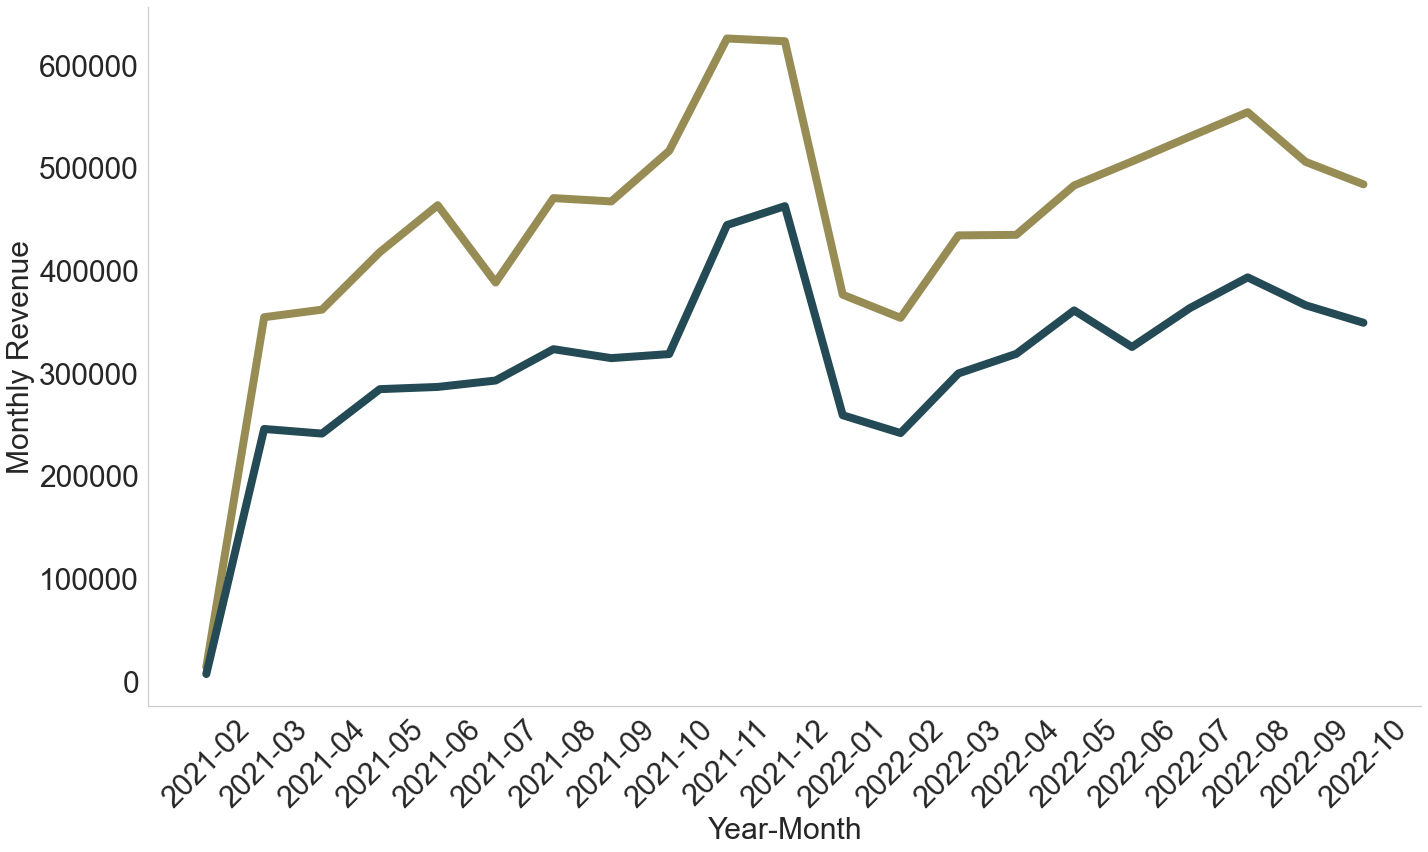

In [442]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax = sns.lineplot(merch_x['month_year'],merch_x['sum(sales_revenue)'], color='#988c55', linewidth=8, sort=True)
ax = sns.lineplot(merch_y['month_year'],merch_y['sum(sales_revenue)'], color='#234a55', linewidth=8, sort=True)
fig = ax.figure
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_ylabel('Monthly Revenue', fontsize=30)
ax.set_xlabel('Year-Month', fontsize=30)
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig('stable_merchant.png', transparent=True, dpi=300)

In [431]:
gdf['log_tot_orders'] = np.log(gdf['total_orders'])

In [243]:
merch_df1['approximate_fraudulent_orders']

0       216.117177
1       664.448991
2        59.650593
3         0.492377
4         5.026389
           ...    
4021      1.235399
4022      8.612226
4023     42.463349
4024      0.355936
4025     17.082750
Name: approximate_fraudulent_orders, Length: 4026, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


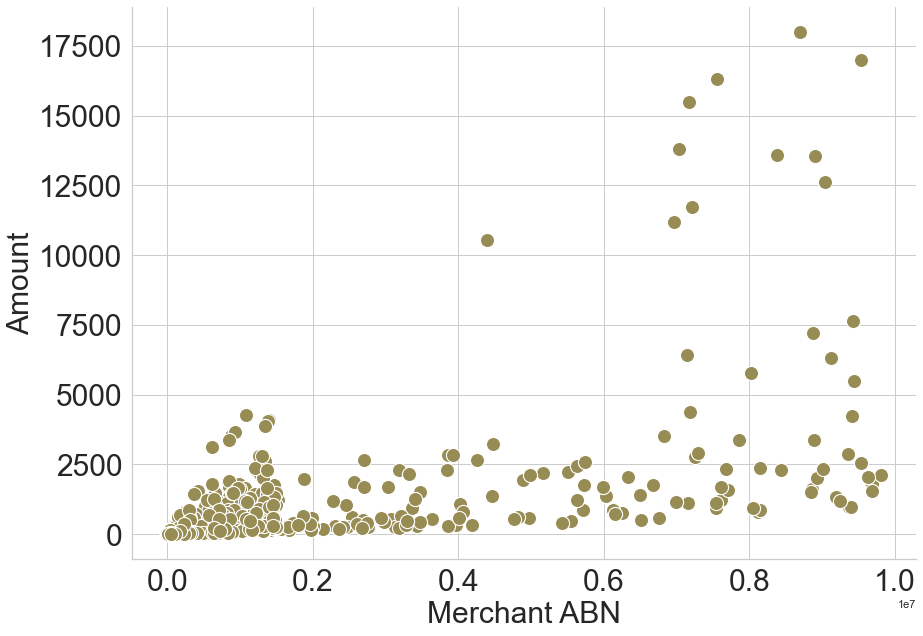

In [266]:
fig, ax = plt.subplots(1, figsize=(13, 9))
ax = sns.scatterplot(merch_df1['sales_revenue'],merch_df1['approximate_fraudulent_orders'], s=200, color='#988c55')
fig = ax.figure
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_ylabel('Amount', fontsize=30)
ax.set_xlabel('Merchant ABN', fontsize=30)
fig.tight_layout()
fig.savefig('random.png', transparent=True, dpi=300)



In [5]:
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
# sns.mpl.rc('figure', figsize=(10,6))

fig, ax = plt.subplots(1, figsize=(13, 9))
# gdf.plot(column='log_tot_orders', linewidth=0.8, edgecolor='0.8',ax=ax)
ax = gdf.plot(column='total_orders', linewidth=0.8, cmap="crest",edgecolor='white', ax=ax, norm=matplotlib.colors.LogNorm(vmin=gdf['total_orders'].min(), vmax=gdf['total_orders'].max()), legend=True)
# remove the axis
fig = ax.figure
cb_ax = fig.axes[1] 
ax.axis('off')
cb_ax.yaxis.label.set_color('white')
cb_ax.tick_params(colors='white')
cb_ax.tick_params(labelsize=30)
# add a title
# ax.set_title(‘Population of Rajasthan’, fontdict={‘fontsize’: ‘25’, ‘fontweight’ : ‘3’})
# create an annotation for the data source

# Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin=gdf['total_orders'].min(), vmax=gdf['total_orders'].max()))
# empty array for the data range
# sm._A = []
# add the colorbar to the figure
# cbar = fig.colorbar(sm)
fig.tight_layout()
#saving our map as .png file.
fig.savefig('map_export2.png', dpi=300, transparent=True)



NameError: name 'gdf' is not defined

In [192]:
import folium
m = folium.Map(location=[25, 133], 
               tiles="cartodb positron",
               zoom_start=3,
               zoom_control=False,
               width=475,
               height=500,
               html='<div style="font-size: 10pt"</div>')

title = '''
        <h3 align="left" style="font-size:16px"><b>
        Total Dollar Spent by SA2 Code</b></h3>'''.format('Corpus Christi')

m.get_root().html.add_child(folium.Element(title))

# refer to the folium documentations on more information on how to plot aggregated data.
c = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=gdf, # data source
    columns=['SA2_MAINCODE_2016','total_revenue_generated'], # the columns required
    key_on='properties.SA2_MAINCODE_2016', # this is from the geoJSON's properties
    bins=4,
    fill_color='YlGn', # color scheme
    line_opacity=0.3,
    nan_fill_color='white',
    legend_name='Total Spending by SA2 from August 2021 to February 2022'
)

c.add_to(m)

m

NameError: name 'geoJSON' is not defined

In [444]:
merch_df1

,merchant_abn,take_rate,sales_revenue,discounted_sales_revenue,num_orders,approximate_fraudulent_orders,avg_daily_rev,discounted_avg_daily_rev,avg_value_per_order,discounted_avg_value_per_order,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
0,10023283211,0.18,7.032777e+05,6.554602e+05,3261,216.117177,1162.442498,1083.405307,215.663205,200.999758,...,1265.899881,1179.828379,0.066273,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10323485998,6.61,1.326997e+06,1.239420e+06,10306,664.448991,2193.383383,2048.627933,128.759649,120.261974,...,87714.498178,81925.655360,0.064472,2150.0,815.744497,238.0,8388.0,158.201830,130.522996,398.0
2,10342410215,6.34,3.294596e+05,3.053016e+05,857,59.650593,544.561404,504.630740,384.433664,356.244572,...,20887.741786,19356.121304,0.069604,876.0,785.972844,0.0,850.0,387.599588,273.855501,38.0
3,10346855916,3.57,6.775178e+03,6.166115e+03,6,0.492377,11.198642,10.191926,1129.196413,1027.685896,...,241.873872,220.130319,0.082063,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
4,10385163239,6.61,2.519346e+04,2.342538e+04,74,5.026389,41.642088,38.719631,340.452204,316.559147,...,1665.287911,1548.417412,0.067924,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,94380689142,3.77,1.846750e+04,1.677845e+04,14,1.235399,30.524790,27.732980,1319.106990,1198.460937,...,696.224669,632.547682,0.088243,24.0,739.169791,0.0,14.0,1319.106990,452.409767,0.0
4022,95331380653,5.65,9.986527e+04,9.135626e+04,108,8.612226,165.066561,151.002091,924.678423,845.891342,...,5642.387734,5161.628966,0.079743,161.0,768.257708,0.0,108.0,924.678423,507.061325,4.0
4023,96794593428,5.75,4.042552e+04,3.784301e+04,674,42.463349,66.819048,62.550433,59.978523,56.146902,...,2324.467644,2175.973172,0.063002,755.0,788.973658,0.0,667.0,60.607982,50.651087,28.0
4024,98850646791,3.66,5.965319e+03,5.428771e+03,4,0.355936,9.860032,8.973176,1491.329779,1357.192797,...,218.330680,198.693025,0.088984,5.0,855.125000,0.0,4.0,1491.329779,312.966965,0.0


In [447]:
merchant_df

,merchant_abn,name,tags,tag,revenue_level,take_rate,sales_revenue,discounted_sales_revenue,num_orders,approximate_fraudulent_orders,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,7.032777e+05,6.554602e+05,3261,216.117177,...,1265.899881,1179.828379,0.066273,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10323485998,Nunc Inc.,"[(furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",a,6.61,1.326997e+06,1.239420e+06,10306,664.448991,...,87714.498178,81925.655360,0.064472,2150.0,815.744497,238.0,8388.0,158.201830,130.522996,398.0
2,10342410215,Facilisis Facilisis Corp.,"([computers, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.34,3.294596e+05,3.053016e+05,857,59.650593,...,20887.741786,19356.121304,0.069604,876.0,785.972844,0.0,850.0,387.599588,273.855501,38.0
3,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,6.775178e+03,6.166115e+03,6,0.492377,...,241.873872,220.130319,0.082063,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
4,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2.519346e+04,2.342538e+04,74,5.026389,...,1665.287911,1548.417412,0.067924,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,94380689142,Aliquet Ltd,"[(motor vehicle supplies and new parts), (b), ...",motor vehicle supplies and new parts,b,3.77,1.846750e+04,1.677845e+04,14,1.235399,...,696.224669,632.547682,0.088243,24.0,739.169791,0.0,14.0,1319.106990,452.409767,0.0
4022,95331380653,Auctor Odio Associates,"[[bicycle shops - sales and service], [a], [ta...",bicycle shops - sales and service,a,5.65,9.986527e+04,9.135626e+04,108,8.612226,...,5642.387734,5161.628966,0.079743,161.0,768.257708,0.0,108.0,924.678423,507.061325,4.0
4023,96794593428,Nunc Id Enim Inc.,"([cable, satellitE, and other pAy television a...","cable, satellite, and other pay television and...",a,5.75,4.042552e+04,3.784301e+04,674,42.463349,...,2324.467644,2175.973172,0.063002,755.0,788.973658,0.0,667.0,60.607982,50.651087,28.0
4024,98850646791,Sapien Industries,"[[hobby, toy and game shops], [b], [take rate:...","hobby, toy and game shops",b,3.66,5.965319e+03,5.428771e+03,4,0.355936,...,218.330680,198.693025,0.088984,5.0,855.125000,0.0,4.0,1491.329779,312.966965,0.0


In [450]:
comment_words = ''
 
# iterate through the csv file
for idx, row in merchant_df.iterrows():
     comment_words+=row['tag']

In [451]:
comment_words

'furniture, home furnishings and equipment shops, and manufacturers, except appliancesfurniture, home furnishings and equipment shops, and manufacturers, except appliancescomputers, computer peripheral equipment, and softwareequipment, tool, furniture, and appliance  rent al and leasingflorists supplies, nursery stock, and flowerscomputers, computer peripheral equipment, and softwarefurniture, home furnishings and equipment shops, and manufacturers, except appliancesgift, card, novelty, and souvenir shopsantique shops - sales, repairs, and restoration servicesstationery, office supplies and printing and writing paperdigital goods: books, movies, musiccomputer programming , data processing, and integrated systems design servicesbooks, periodicals, and newspapersshoe shopsshoe shopshealth and beauty spaslawn and garden supply outlets, including nurseriestent and awning shopsmusic shops - musical instruments, pianos, and sheet musicwatch, clock, and jewelry repair shopsmotor vehicle suppl

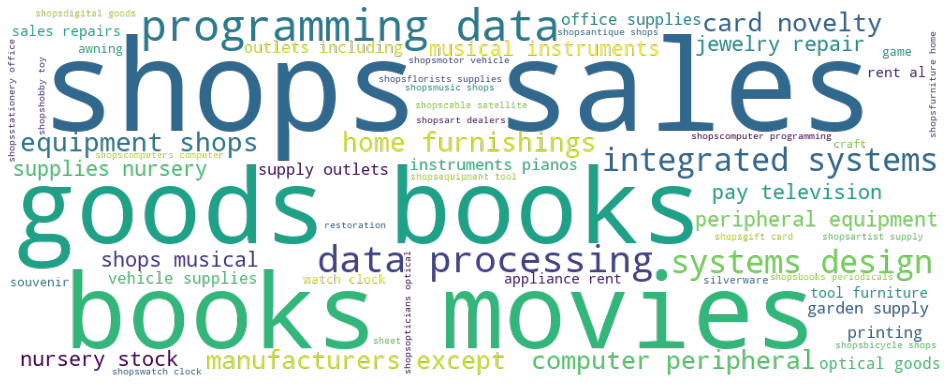

In [461]:

# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# comment_words = ''
 
# # iterate through the csv file
# for idx, row in merchant_df.iterrows():
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(mode = "RGBA", width = 1000, height = 400,
                background_color =None,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image    

fig, ax = plt.subplots(1, figsize=(13, 9))

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
fig.savefig('tag_cloud.png', transparent=True, dpi=300) 
plt.show()

In [634]:
top_100 = pd.read_csv('/Users/oliver/Downloads/top-100-merchants.csv')

In [649]:
top_100.columns

Index(['rank', 'merchant_abn', 'name', 'tags', 'tag', 'numd_sa2_code',
       'returning_customers', 'unique_customers', 'median_weekly_income',
       'commission_avg_tot_dollar_value_monthly', 'avg_num_order_id_monthly',
       'avg_discounted_value', 'stddev_tot_dollar_value_monthly',
       'rate_fraud_order', 'stddev_tot_discounted_value_daily',
       'minmax_numd_sa2_code', 'minmax_returning_customers',
       'minmax_unique_customers', 'minmax_median_weekly_income',
       'minmax_commission_avg_tot_dollar_value_monthly',
       'minmax_avg_num_order_id_monthly', 'minmax_avg_discounted_value',
       'minmax_stddev_tot_dollar_value_monthly', 'minmax_rate_fraud_order',
       'minmax_stddev_tot_discounted_value_daily', 'average_rank',
       'discounted_avg_daily_rev'],
      dtype='object')

In [635]:
merch_df1.columns

Index(['merchant_abn', 'take_rate', 'sales_revenue',
       'discounted_sales_revenue', 'num_orders',
       'approximate_fraudulent_orders', 'avg_daily_rev',
       'discounted_avg_daily_rev', 'avg_value_per_order',
       'discounted_avg_value_per_order', 'avg_daily_orders',
       'avg_daily_approximate_fraudulent_orders', 'std_daily_revenue',
       'std_daily_discounted_revenue', 'avg_daily_commission',
       'discounted_avg_daily_commission', 'avg_commission_per_order',
       'discounted_avg_commission_per_order', 'overall_commission',
       'discounted_overall_commission', 'overall_fraud_rate',
       'sa2_region_count', 'median_customer_income', 'returning_customers',
       'unique_customers', 'mean_spending', 'std_spending', 'vip_customers'],
      dtype='object')

In [637]:
merch_df1

,merchant_abn,take_rate,sales_revenue,discounted_sales_revenue,num_orders,approximate_fraudulent_orders,avg_daily_rev,discounted_avg_daily_rev,avg_value_per_order,discounted_avg_value_per_order,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
0,10023283211,0.18,7.032777e+05,6.554602e+05,3261,216.117177,1162.442498,1083.405307,215.663205,200.999758,...,1265.899881,1179.828379,0.066273,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10323485998,6.61,1.326997e+06,1.239420e+06,10306,664.448991,2193.383383,2048.627933,128.759649,120.261974,...,87714.498178,81925.655360,0.064472,2150.0,815.744497,238.0,8388.0,158.201830,130.522996,398.0
2,10342410215,6.34,3.294596e+05,3.053016e+05,857,59.650593,544.561404,504.630740,384.433664,356.244572,...,20887.741786,19356.121304,0.069604,876.0,785.972844,0.0,850.0,387.599588,273.855501,38.0
3,10346855916,3.57,6.775178e+03,6.166115e+03,6,0.492377,11.198642,10.191926,1129.196413,1027.685896,...,241.873872,220.130319,0.082063,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
4,10385163239,6.61,2.519346e+04,2.342538e+04,74,5.026389,41.642088,38.719631,340.452204,316.559147,...,1665.287911,1548.417412,0.067924,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,94380689142,3.77,1.846750e+04,1.677845e+04,14,1.235399,30.524790,27.732980,1319.106990,1198.460937,...,696.224669,632.547682,0.088243,24.0,739.169791,0.0,14.0,1319.106990,452.409767,0.0
4022,95331380653,5.65,9.986527e+04,9.135626e+04,108,8.612226,165.066561,151.002091,924.678423,845.891342,...,5642.387734,5161.628966,0.079743,161.0,768.257708,0.0,108.0,924.678423,507.061325,4.0
4023,96794593428,5.75,4.042552e+04,3.784301e+04,674,42.463349,66.819048,62.550433,59.978523,56.146902,...,2324.467644,2175.973172,0.063002,755.0,788.973658,0.0,667.0,60.607982,50.651087,28.0
4024,98850646791,3.66,5.965319e+03,5.428771e+03,4,0.355936,9.860032,8.973176,1491.329779,1357.192797,...,218.330680,198.693025,0.088984,5.0,855.125000,0.0,4.0,1491.329779,312.966965,0.0


In [638]:
top_100 = top_100.join(merch_df1[['merchant_abn', 'discounted_avg_daily_rev']].set_index('merchant_abn'), on=['merchant_abn'], how='left', rsuffix='x')

In [639]:
top_100.columns

Index(['rank', 'merchant_abn', 'name', 'tags', 'tag', 'numd_sa2_code',
       'returning_customers', 'unique_customers', 'median_weekly_income',
       'commission_avg_tot_dollar_value_monthly', 'avg_num_order_id_monthly',
       'avg_discounted_value', 'stddev_tot_dollar_value_monthly',
       'rate_fraud_order', 'stddev_tot_discounted_value_daily',
       'minmax_numd_sa2_code', 'minmax_returning_customers',
       'minmax_unique_customers', 'minmax_median_weekly_income',
       'minmax_commission_avg_tot_dollar_value_monthly',
       'minmax_avg_num_order_id_monthly', 'minmax_avg_discounted_value',
       'minmax_stddev_tot_dollar_value_monthly', 'minmax_rate_fraud_order',
       'minmax_stddev_tot_discounted_value_daily', 'average_rank',
       'discounted_avg_daily_rev'],
      dtype='object')

In [640]:
top_100['unique_customers']

0     24078.0
1     24058.0
2     24080.0
3     24079.0
4     24081.0
       ...   
95    12062.0
96    11459.0
97    10806.0
98    11968.0
99    11519.0
Name: unique_customers, Length: 100, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


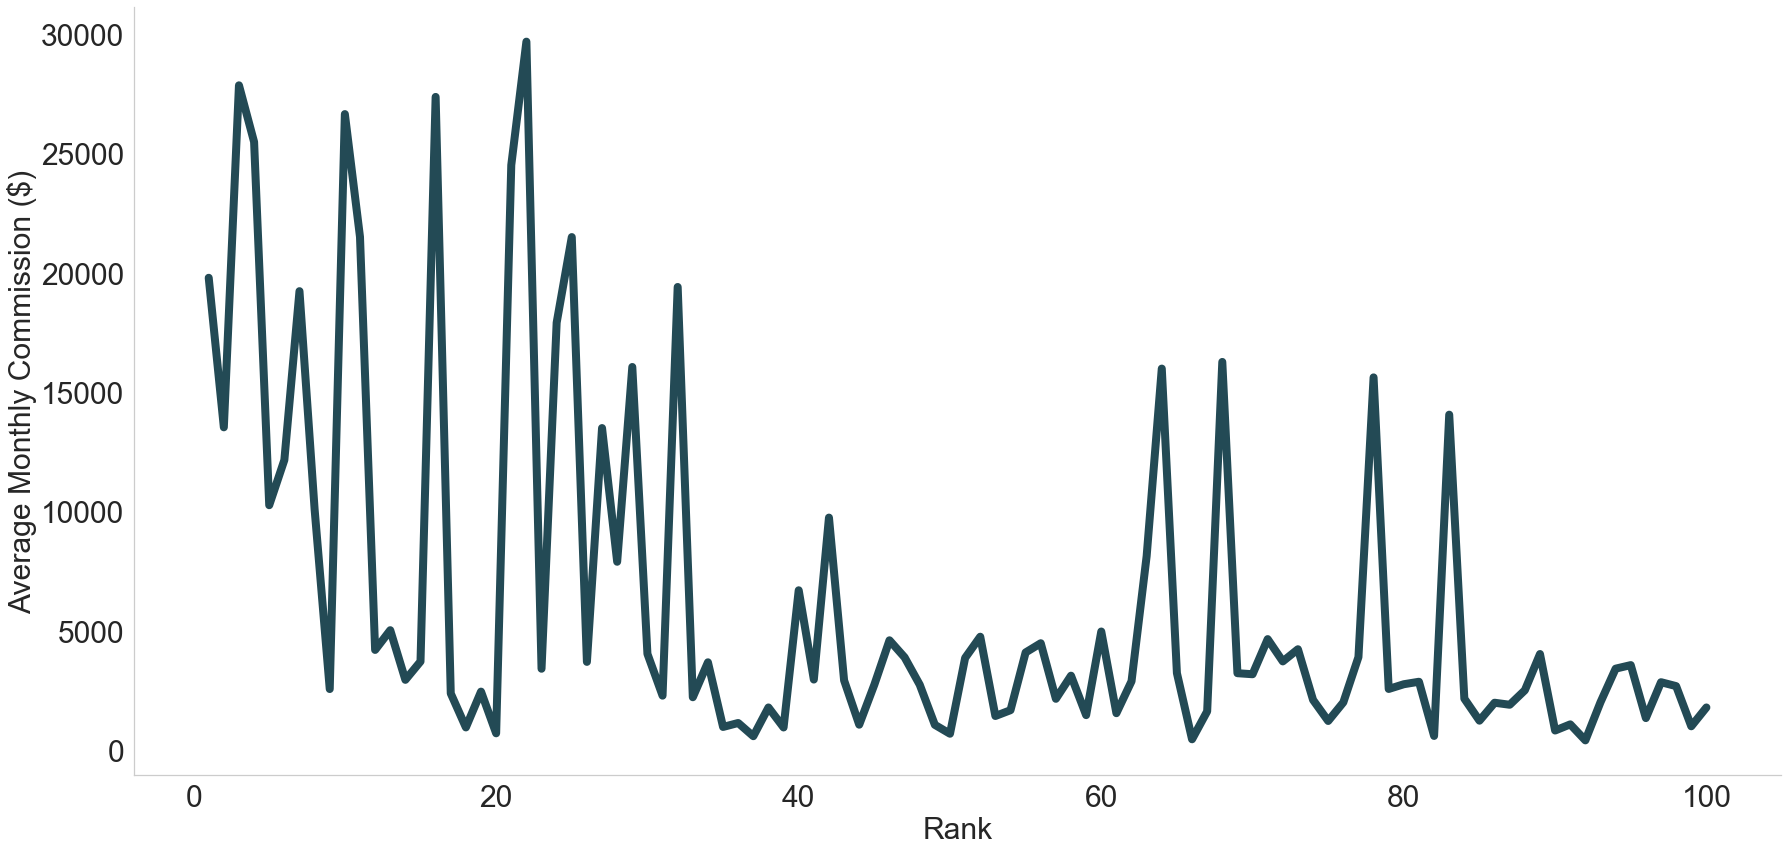

In [657]:
fig, ax = plt.subplots(1, figsize=(25, 12))
ax = sns.lineplot(top_100['rank'],top_100['commission_avg_tot_dollar_value_monthly'], color='#234a55', linewidth=8, sort=True)
fig = ax.figure
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_ylabel('Average Monthly Commission ($)', fontsize=30)
ax.set_xlabel('Rank', fontsize=30)
plt.xticks(rotation=0)
fig.tight_layout()
fig.savefig('top_100_monthly_commission.png', transparent=True, dpi=300)